In [1]:
%matplotlib inline

import numpy as np
from numpy import linalg as nla
import scipy as sp
from scipy import linalg as sla
from matplotlib import pyplot as plt
from time import time
import SHFunctions as shf
import os

    A = shf.MakeStochA(8,3)
    Ss = shf.NewtonPoly(A)
    
    ax = plt.subplot(111)
    ax.semilogy(Ss['errs'],'-o')

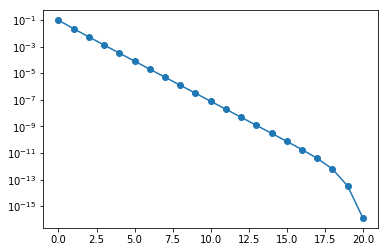

In [2]:
    A = shf.MakeSingularA(8, 4, delta = .000001)
    Ss = shf.NewtonPoly(A)

    ax = plt.subplot(111)
    ax.semilogy(Ss['errs'],'-o')

In [3]:
# S - X_{i}와 X_{i+1} - X_{i}의 Frobenius norm 구하기
nSmX = []
for X in Ss['Xs']:
    nSmX.append(nla.norm(Ss['sol'] - X,'fro'))

nXmX = []
for i in range(len(Ss['Xs'])-1):
    nXmX.append(nla.norm(Ss['Xs'][i+1] - Ss['Xs'][i],'fro'))

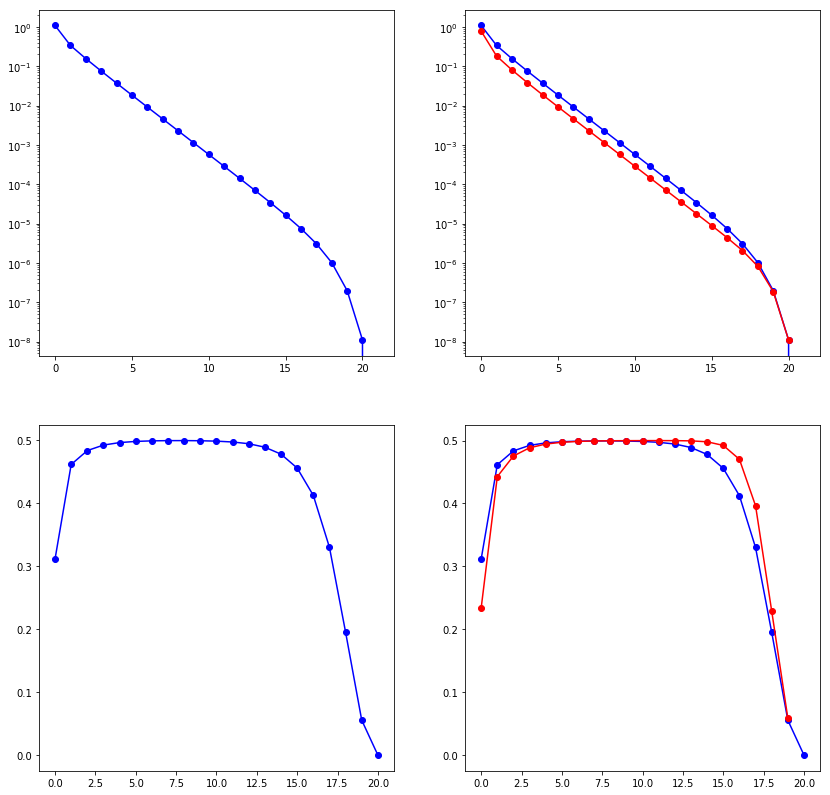

In [4]:
# 그래프로 S - X_{i}와 X_{i+1} - X_{i} 비교
dXoverdX = [nXmX[i+1] / nXmX[i] for i in range(len(nXmX)-1)]
dSoverdS = [nSmX[i+1] / nSmX[i] for i in range(len(nSmX)-1)]
fig, axes = plt.subplots(2,2,figsize=(14, 14))
axes[0,0].semilogy(nSmX,'-ob')
axes[0,1].semilogy(nSmX,'-ob')
axes[0,1].semilogy(nXmX,'-or')
axes[1,0].plot(dSoverdS,'-ob')
axes[1,1].plot(dSoverdS,'-ob')
axes[1,1].plot(dXoverdX, '-or')